In [1]:
#importer les packages 

import os #explorer les fichiers

import pandas as pd #
import matplotlib.pyplot as plt #pour la visualisation
import seaborn as sns #pour la visualisation 


In [127]:
#creer une liste de fichier pour récuprer non données
files=[ file for file in os.listdir(r'C:\Users\warda\Downloads\IA_Miage\data_cdrama') if file.endswith('.csv')]
for file in files:
    print(file)

all_data.csv
Cdrama.csv
Cdrama_data.csv
dramas_page_1.csv
dramas_page_10.csv
dramas_page_11.csv
dramas_page_12.csv
dramas_page_13.csv
dramas_page_14.csv
dramas_page_15.csv
dramas_page_2.csv
dramas_page_3.csv
dramas_page_4.csv
dramas_page_5.csv
dramas_page_6.csv
dramas_page_7.csv
dramas_page_8.csv
dramas_page_9.csv


In [143]:
Cdrama_data.to_csv(path+'/Cdrama_data.csv',index=False)

In [145]:
#voir les données
Cdrama.dtypes

Nom                 object
Genre               object
Épisodes           float64
Score              float64
Rank               float64
Téléspectateurs     object
Acteurs             object
Date Debut          object
Date Fin            object
dtype: object

In [147]:
Cdrama_data.head()

,Nom,Genre,Épisodes,Date de Diffusion,Score,Rank,Téléspectateurs,Acteurs,Date Debut,Date Fin
0,Joy of Life Season 2 (2024),"Comedy, Romance, Wuxia, Fantasy",36.0,"May 16, 2024 - May 30, 2024",9.0,64.0,"12,002","Zhang Ruo Yun, Wu Gang, Li Qin, Chen Dao Ming,...","May 16, 2024","May 30, 2024"
1,The Spirealm (2024),"Mystery, Horror, Comedy, Fantasy",78.0,"Feb 2, 2024",8.9,90.0,"12,781","Xia Zhi Guang, Huang Jun Jie, Liu Ruo Gu, Liu ...","Feb 2, 2024",None
2,The Double (2024),"Historical, Mystery",40.0,"Jun 2, 2024 - Jun 22, 2024",8.8,132.0,"28,934","Wu Jin Yan, Wang Xing Yue, Chen Xin Hai, Liang...","Jun 2, 2024","Jun 22, 2024"
3,Blossom (2024),"Historical, Mystery, Romance, Fantasy",34.0,"Dec 6, 2024 - Dec 22, 2024",8.8,147.0,"18,461","Meng Zi Yi, Li Yun Rui, Snow Kong, Xia Zhi Gua...","Dec 6, 2024","Dec 22, 2024"
4,Guardians of the Dafeng (2024),"Comedy, Romance, Wuxia, Fantasy",40.0,"Dec 28, 2024 - Jan 18, 2025",8.7,209.0,"14,169","Dylan Wang, Tian Xi Wei, Liu Yi Jun, Yan Zi Do...","Dec 28, 2024","Jan 18, 2025"


In [133]:
#voir les valeurs manquantes
Cdrama_data.isnull().sum()

Nom                    0
Genre                 24
Épisodes               0
Date de Diffusion      8
Score                 16
Rank                   0
Téléspectateurs        0
Acteurs              344
Date Debut             0
Date Fin             448
dtype: int64

In [81]:
#supprimer les valeurs manquantes 
#La dropna()méthode supprime les lignes qui contiennent des valeurs NULL.
Cdrama_data=Cdrama_data.dropna(how='all')
mot_cible = "The requested page was not found,,,,,,,"
Cdrama_data = Cdrama_data[~Cdrama_data.apply(lambda row: row.astype(str).str.contains(mot_cible, na=False)).all(axis=1)]
Cdrama_data.shape #La forme d'un tableau est le nombre d'éléments dans chaque dimension. ligne et colones

(660, 8)

In [137]:
import os
import pandas as pd

# Définir le chemin du dossier contenant les fichiers CSV
path = r'C:\Users\warda\Downloads\IA_Miage\data_cdrama'

# Récupérer la liste des fichiers CSV
files = [file for file in os.listdir(path) if file.endswith('.csv')]

# Lire et concaténer les fichiers en une seule DataFrame
data_frames = [pd.read_csv(os.path.join(path, file)) for file in files]
Cdrama_data = pd.concat(data_frames, ignore_index=True)

# Supprimer les lignes contenant le mot cible dans au moins une colonne
mot_cible = "The requested page was not found"
Cdrama_data = Cdrama_data[~Cdrama_data.astype(str).apply(lambda x: x.str.contains(mot_cible, na=False)).any(axis=1)]

# Sauvegarder la base propre
Cdrama_data.to_csv(os.path.join(path, 'Cdrama_data.csv'), index=False)

# Afficher des infos sur la base
print("Nombre de lignes et colonnes après nettoyage:", Cdrama_data.shape)
print("Nombre de valeurs nulles par colonne :\n", Cdrama_data.isnull().sum())


Nombre de lignes et colonnes après nettoyage: (5400, 10)
Nombre de valeurs nulles par colonne :
 Nom                     0
Genre                  54
Épisodes                0
Date de Diffusion    2410
Score                  36
Rank                    0
Téléspectateurs         0
Acteurs               774
Date Debut           3008
Date Fin             3448
dtype: int64


In [115]:


# Définir un chemin absolu pour éviter les erreurs
chemin_fichier = os.path.join(os.getcwd(), "Cdrama.csv")

# Créer un nouveau DataFrame sans la colonne "Date de Diffusion"
Cdrama = Cdrama_data.drop(columns=['Date de Diffusion'], errors='ignore')

# Sauvegarder le nouveau DataFrame dans un fichier CSV
Cdrama.to_csv(chemin_fichier, index=False, encoding="utf-8")

print(f"✅ Nouveau fichier enregistré : {chemin_fichier}")


✅ Nouveau fichier enregistré : C:\Users\warda\Downloads\IA_Miage\data_sales\Cdrama.csv


Quel est le mois durant lequel il a réalise le meilleur chiffre d’affaires.

In [149]:
#prendre la date de debut 
def extract_start_date(date_range):
    return date_range.split(" - ")[0].strip()  # Récupère la date de début et enlève les espaces

Cdrama_data['Date Debut'] = Cdrama_data['Date de Diffusion'].astype(str).apply(extract_start_date)

def extract_end_date(date_range):
    return date_range.split(" - ")[1].strip() if " - " in date_range else None  # Vérifie si la date contient '-'

Cdrama_data['Date Fin'] = Cdrama_data['Date de Diffusion'].astype(str).apply(extract_end_date)
Cdrama_data

,Nom,Genre,Épisodes,Date de Diffusion,Score,Rank,Téléspectateurs,Acteurs,Date Debut,Date Fin
0,Joy of Life Season 2 (2024),"Comedy, Romance, Wuxia, Fantasy",36.0,"May 16, 2024 - May 30, 2024",9.0,64.0,"12,002","Zhang Ruo Yun, Wu Gang, Li Qin, Chen Dao Ming,...","May 16, 2024","May 30, 2024"
1,The Spirealm (2024),"Mystery, Horror, Comedy, Fantasy",78.0,"Feb 2, 2024",8.9,90.0,"12,781","Xia Zhi Guang, Huang Jun Jie, Liu Ruo Gu, Liu ...","Feb 2, 2024",None
2,The Double (2024),"Historical, Mystery",40.0,"Jun 2, 2024 - Jun 22, 2024",8.8,132.0,"28,934","Wu Jin Yan, Wang Xing Yue, Chen Xin Hai, Liang...","Jun 2, 2024","Jun 22, 2024"
3,Blossom (2024),"Historical, Mystery, Romance, Fantasy",34.0,"Dec 6, 2024 - Dec 22, 2024",8.8,147.0,"18,461","Meng Zi Yi, Li Yun Rui, Snow Kong, Xia Zhi Gua...","Dec 6, 2024","Dec 22, 2024"
4,Guardians of the Dafeng (2024),"Comedy, Romance, Wuxia, Fantasy",40.0,"Dec 28, 2024 - Jan 18, 2025",8.7,209.0,"14,169","Dylan Wang, Tian Xi Wei, Liu Yi Jun, Yan Zi Do...","Dec 28, 2024","Jan 18, 2025"
...,...,...,...,...,...,...,...,...,...,...
5453,Chasing Love (2024),"Historical, Romance, Fantasy",24.0,"Feb 22, 2024 - Mar 8, 2024",7.3,7775.0,"1,027","Smile Hu, Yan Zi Xian, Bi Shao Yan, Wang Jun Z...","Feb 22, 2024","Mar 8, 2024"
5454,The Princess (2024),"Historical, Mystery, Romance, Drama",40.0,"Sep 26, 2024 - Oct 11, 2024",7.3,7685.0,"1,054","Yuan Hao, Jiang Zhi Nan, Qiu Hong Kai, Zhu Zi ...","Sep 26, 2024","Oct 11, 2024"
5455,Blade's Dance with You (2024),"Thriller, Historical, Romance, Crime",24.0,"Jun 20, 2024 - Jul 6, 2024",7.3,7847.0,"1,259","Hong Xiao, Yang Ze, Bellamy, Sun An Qi, Wang Z...","Jun 20, 2024","Jul 6, 2024"
5456,Walk with You (2024),"Historical, Romance, Supernatural",24.0,"Apr 23, 2024 - Apr 26, 2024",7.3,7934.0,"1,145","Lin Ze Hui, Zizi Xu, Zhu Min Xin, He Shi, Gao ...","Apr 23, 2024","Apr 26, 2024"


In [153]:
Cdrama_data['Date Debut'].unique()


array(['May 16, 2024', 'Feb 2, 2024', 'Jun 2, 2024', 'Dec 6, 2024',
       'Dec 28, 2024', 'May 7, 2024', 'Apr 2, 2024', 'Mar 18, 2024',
       'Mar 9, 2024', 'Oct 26, 2024', 'Nov 1, 2024', 'Aug 12, 2024',
       'Jul 18, 2024', 'Mar 21, 2024', 'Apr 22, 2024', 'Jul 19, 2024',
       'Oct 10, 2024', 'Dec 10, 2024', 'Apr 6, 2024', 'Feb 23, 2024',
       'Feb 25, 2024', 'Mar 23, 2024', 'May 14, 2024', 'Oct 25, 2024',
       'Feb 12, 2024', 'Aug 29, 2024', 'Apr 30, 2024', 'Jan 9, 2024',
       'Jul 25, 2024', 'Mar 4, 2024', 'Oct 24, 2024', 'Jul 6, 2024',
       'May 27, 2024', 'Jun 28, 2024', 'Jan 24, 2024', 'Nov 2, 2024',
       'Dec 23, 2024', 'Jan 31, 2024', 'Mar 15, 2024', 'Jul 13, 2024',
       'Apr 29, 2024', 'Jan 4, 2024', 'Jun 11, 2024', 'Feb 28, 2024',
       'May 23, 2024', 'Jun 27, 2024', 'Jan 12, 2024', 'Oct 29, 2024',
       'Sep 3, 2024', 'Sep 27, 2024', 'May 21, 2024', 'Dec 29, 2024',
       'Jul 9, 2024', 'Nov 5, 2024', 'Jun 17, 2024', 'Oct 4, 2024',
       'Feb 5, 2024', '

In [159]:
#filtrer la valeur order month
Cdrama_data=Cdrama_data[Cdrama_data['Date Debut']!='Date de Diffusion']
Cdrama_data['Date Debut'].unique()

array(['May 16, 2024', 'Feb 2, 2024', 'Jun 2, 2024', 'Dec 6, 2024',
       'Dec 28, 2024', 'May 7, 2024', 'Apr 2, 2024', 'Mar 18, 2024',
       'Mar 9, 2024', 'Oct 26, 2024', 'Nov 1, 2024', 'Aug 12, 2024',
       'Jul 18, 2024', 'Mar 21, 2024', 'Apr 22, 2024', 'Jul 19, 2024',
       'Oct 10, 2024', 'Dec 10, 2024', 'Apr 6, 2024', 'Feb 23, 2024',
       'Feb 25, 2024', 'Mar 23, 2024', 'May 14, 2024', 'Oct 25, 2024',
       'Feb 12, 2024', 'Aug 29, 2024', 'Apr 30, 2024', 'Jan 9, 2024',
       'Jul 25, 2024', 'Mar 4, 2024', 'Oct 24, 2024', 'Jul 6, 2024',
       'May 27, 2024', 'Jun 28, 2024', 'Jan 24, 2024', 'Nov 2, 2024',
       'Dec 23, 2024', 'Jan 31, 2024', 'Mar 15, 2024', 'Jul 13, 2024',
       'Apr 29, 2024', 'Jan 4, 2024', 'Jun 11, 2024', 'Feb 28, 2024',
       'May 23, 2024', 'Jun 27, 2024', 'Jan 12, 2024', 'Oct 29, 2024',
       'Sep 3, 2024', 'Sep 27, 2024', 'May 21, 2024', 'Dec 29, 2024',
       'Jul 9, 2024', 'Nov 5, 2024', 'Jun 17, 2024', 'Oct 4, 2024',
       'Feb 5, 2024', '

In [165]:
#convertir en date
Cdrama_data['Date Debut'] = pd.to_datetime(Cdrama_data['Date Debut'], errors='coerce')
Cdrama_data['Date Fin'] = pd.to_datetime(Cdrama_data['Date Fin'], errors='coerce')
Cdrama_data.dtypes

Nom                          object
Genre                        object
Épisodes                    float64
Date de Diffusion            object
Score                       float64
Rank                        float64
Téléspectateurs              object
Acteurs                      object
Date Debut           datetime64[ns]
Date Fin             datetime64[ns]
dtype: object

#Le drama le mieux notes 

In [168]:
Cdrama_data["Score"].mean()

7.631543624161074

Quels sont les 10 dramas les mieux notés ?

In [179]:
# Supprimer les lignes en double
Cdrama_data = Cdrama_data.drop_duplicates()

# Vérifier le résultat
print(Cdrama_data)


                                                    Nom  \
0                           Joy of Life Season 2 (2024)   
1                                   The Spirealm (2024)   
2                                     The Double (2024)   
3                                        Blossom (2024)   
4                        Guardians of the Dafeng (2024)   
...                                                 ...   
5255                                   Love Miss (2024)   
5256                                  Scout Hero (2024)   
5257                        Jiao Guan De Shou Hu (2024)   
5258  Tou Ting Wo Xin Sheng Hou Huang Di Bang Wo Qu ...   
5259               Jiang Xiao Jie Ta Xia Shan Le (2024)   

                                      Genre  Épisodes  \
0           Comedy, Romance, Wuxia, Fantasy      36.0   
1          Mystery, Horror, Comedy, Fantasy      78.0   
2                       Historical, Mystery      40.0   
3     Historical, Mystery, Romance, Fantasy      34.0   
4     

In [181]:
# Vérifier les doublons dans tout le DataFrame
doublons = Cdrama_data.duplicated()

# Afficher les lignes dupliquées
print(Cdrama_data[doublons])

Empty DataFrame
Columns: [Nom, Genre, Épisodes, Date de Diffusion, Score, Rank, Téléspectateurs, Acteurs, Date Debut, Date Fin]
Index: []


In [183]:
Cdrama_data[['Nom', 'Score']].sort_values(by='Score', ascending=False).head(10)


,Nom,Score
0,Joy of Life Season 2 (2024),9.0
330,Joy of Life Season 2 (2024),9.0
1,The Spirealm (2024),8.9
331,The Spirealm (2024),8.9
2,The Double (2024),8.8
332,The Double (2024),8.8
333,Blossom (2024),8.8
3,Blossom (2024),8.8
338,Angels Fall Sometimes (2024),8.7
334,Guardians of the Dafeng (2024),8.7


In [36]:
#grouper la somme des ventes de chaque mois
all_data.groupby('Month')['Sales'].sum()

Month
1      7289026.92
2      8808089.68
3     11228401.52
4     13562680.96
5     12610427.00
6     10311209.04
7     10591103.04
8      8977871.52
9      8390240.52
10    14946907.52
11    12798412.80
12    18453773.36
Name: Sales, dtype: float64

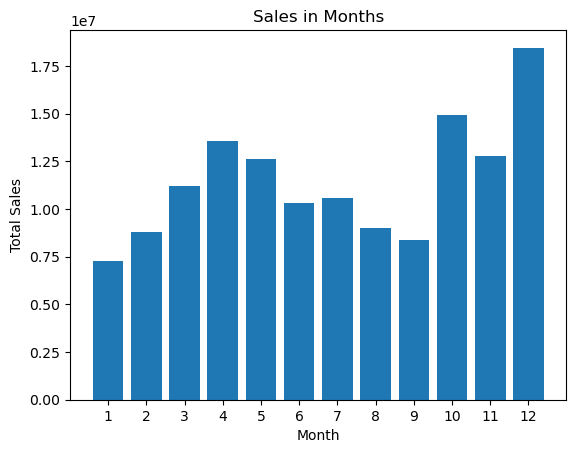

In [82]:
mois_noms = months=range(1,13)
plt.bar(months,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.title('Sales in Months')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.savefig('Sales_in_Months.jpg')
plt.show()


Dans quelle ville il a enregistré un maximum de commandes

In [39]:
#Mentre le nom de la ville
def city(x):
    return x.split(',')[1]

In [41]:
 all_data['City']=all_data['Purchase Address'].apply(city)
all_data

C:\Users\warda\AppData\Local\Temp\ipykernel_3112\3306910879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [43]:
#regroupons les viles
City_order=all_data.groupby('City')['City'].count()
City_order

City
Atlanta           59524
Austin            39620
Boston            79736
Dallas            59280
Los Angeles      118420
New York City     99504
Portland          49860
San Francisco    178928
Seattle           58928
Name: City, dtype: int64

In [45]:
City_order.values

array([ 59524,  39620,  79736,  59280, 118420,  99504,  49860, 178928,
        58928], dtype=int64)

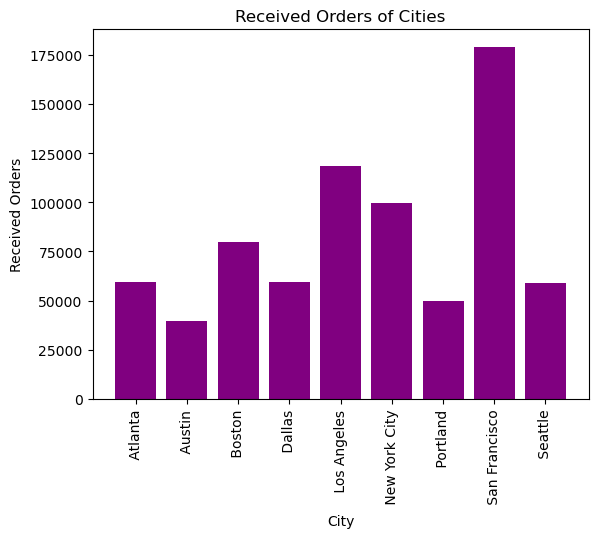

In [86]:
plt.bar(City_order.index, City_order.values,color='purple')
plt.xticks(rotation='vertical')
plt.title('Received Orders of Cities')
plt.ylabel('Received Orders')
plt.xlabel('City')
plt.savefig('Received Orders.jpg', bbox_inches='tight', dpi=300) 
plt.show()

-	En quelle moment doit-il faire une campagne publicitaire pour avoir plus de ventes :

In [50]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

all_data

C:\Users\warda\AppData\Local\Temp\ipykernel_3112\217604426.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
C:\Users\warda\AppData\Local\Temp\ipykernel_3112\217604426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [51]:
# creer des variales
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))

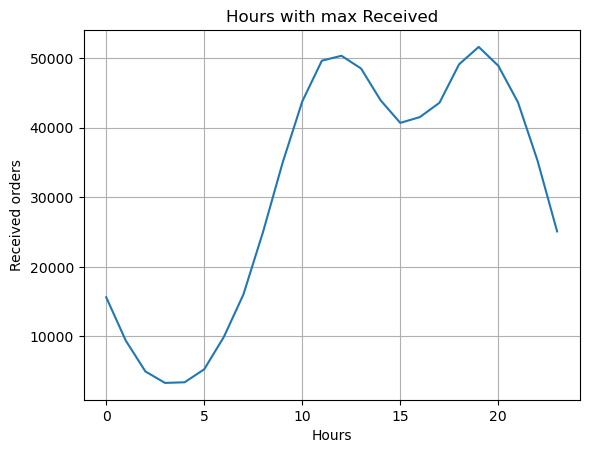

In [88]:
plt.grid()
plt.plot(keys,hours)
plt.ylabel('Received orders')
plt.xlabel('Hours')
plt.title( 'Hours with max Received')
plt.savefig('Hours with max Received', bbox_inches='tight', dpi=300) 


#on peut voir que c'est entre 12h et 19h qu'on a plus de comamndes

Quels sont les produits qui se vendent le plus ?

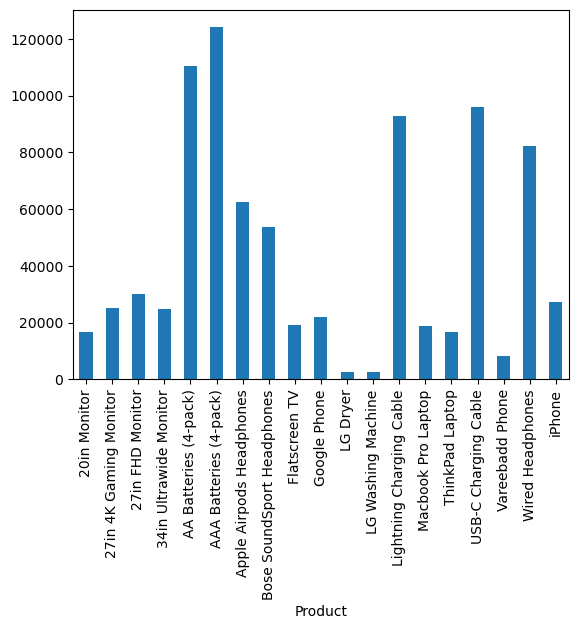

In [92]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')
plt.savefig('Quantity_Ordered_per_Product.jpg', bbox_inches='tight', dpi=300)

pourquoi elles se vendent le plus 

In [57]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [58]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\warda\AppData\Local\Temp\ipykernel_3112\2998676682.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

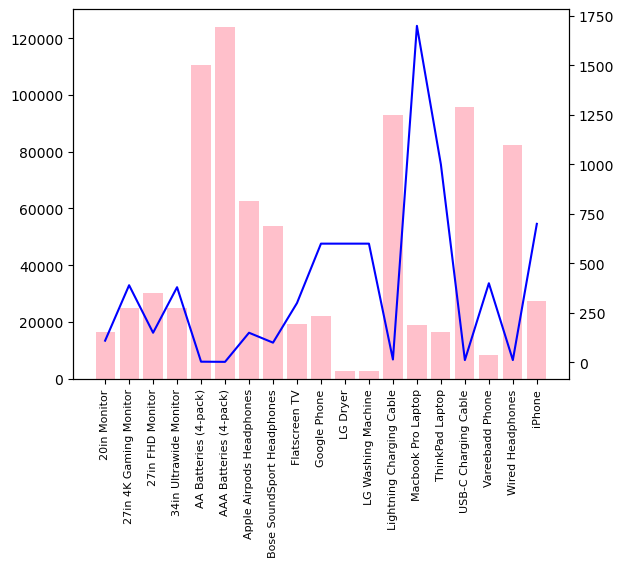

In [59]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color ='pink')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)

Les combinaisons des produits qui se vendent le plus 

In [62]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [63]:
#regrouper les commandes avec le même ID 
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [64]:
df['Grouped']

0        USB-C Charging Cable,USB-C Charging Cable,USB-...
2        Bose SoundSport Headphones,Bose SoundSport Hea...
3        Google Phone,Wired Headphones,Google Phone,Wir...
4        Google Phone,Wired Headphones,Google Phone,Wir...
5        Wired Headphones,Wired Headphones,Wired Headph...
                               ...                        
11681    AAA Batteries (4-pack),AAA Batteries (4-pack),...
11682                          iPhone,iPhone,iPhone,iPhone
11683                          iPhone,iPhone,iPhone,iPhone
11684    34in Ultrawide Monitor,34in Ultrawide Monitor,...
11685    USB-C Charging Cable,USB-C Charging Cable,USB-...
Name: Grouped, Length: 743800, dtype: object

In [170]:
# supprimer les element supprimer 
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,"iPhone,iPhone,iPhone"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,"iPhone,iPhone,iPhone"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [171]:
#conmpter les combinaisons les plus acheter
df2['Grouped'].value_counts()  #prendre les 5 premiers

Grouped
Lightning Charging Cable,Lightning Charging Cable,Lightning Charging Cable                                                                                                          19831
AAA Batteries (4-pack),AAA Batteries (4-pack),AAA Batteries (4-pack)                                                                                                                19826
AA Batteries (4-pack),AA Batteries (4-pack),AA Batteries (4-pack)                                                                                                                   19809
USB-C Charging Cable,USB-C Charging Cable,USB-C Charging Cable                                                                                                                      19792
Wired Headphones,Wired Headphones,Wired Headphones                                                                                                                                  17208
                                                              

Visualisation

<Axes: ylabel='count'>

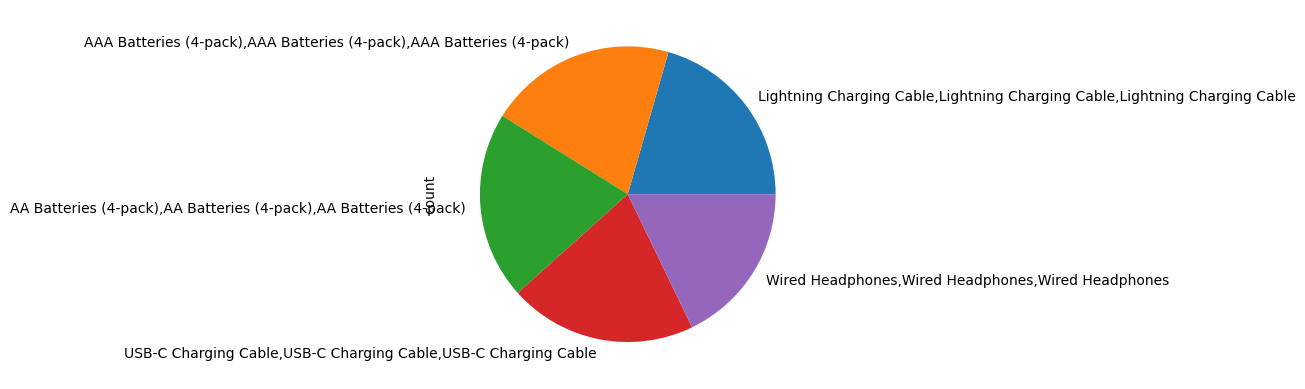

In [173]:
df2['Grouped'].value_counts() [0:5].plot.pie()